In [46]:
import numpy as np
import pandas as pd
import matplotlib
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# 读取数据
df = pd.read_csv('/mnt/raid/zanzhuheng/working/NCOC/push_code/out_csv/sampled_df_2024.csv')
df = df[df['label'] != 'MUC']


In [47]:
df.head()

,image_id,y,x,patch_id,v1,v2,v3,v4,v5,v6,...,v377,v378,v379,v380,v381,v382,v383,v384,label,image_path
1,_SQS600P-222400AG_20240624-194451,52,62,_SQS600P-222400AG_20240624-194451_012913_62-52,1.895752,2.266635,0.815217,0.021002,0.880579,1.963996,...,-1.541138,1.748611,13.819141,-0.652163,-1.704181,1.124645,0.216053,-5.295609,CCOC,/mnt/raid/zanzhuheng/copy/NCOC/OC_202/svs/CCOC...
2,_SQS600P-222400AG_20240624-210522,59,319,_SQS600P-222400AG_20240624-210522_021894_319-59,2.862735,-2.247570,1.746892,-0.571576,-0.668233,2.112840,...,2.038499,-3.482217,4.783710,1.450033,1.195895,1.322729,-4.974670,-2.989376,ECOC,/mnt/raid/zanzhuheng/copy/NCOC/OC_202/svs/ECOC...
3,_SQS600P-222400AG_20240624-210219,78,258,_SQS600P-222400AG_20240624-210219_025667_258-78,3.989526,-1.420768,1.104695,-0.240220,0.688950,-2.494665,...,3.063601,2.813369,11.661097,-0.568317,1.012763,1.383207,-0.091679,-2.051537,ECOC,/mnt/raid/zanzhuheng/copy/NCOC/OC_202/svs/ECOC...
4,_SQS600P-222400AG_20240625-164329,103,293,_SQS600P-222400AG_20240625-164329_032728_293-103,3.098289,-2.430340,-0.997216,-0.446394,-0.244243,3.953978,...,0.651309,-5.618010,5.990074,1.121244,-0.442698,1.619834,-1.031336,-2.836916,ECOC,/mnt/raid/zanzhuheng/copy/NCOC/OC_lc/ECOC/_SQS...
5,_SQS600P-222400AG_20240624-191351,71,65,_SQS600P-222400AG_20240624-191351_012244_65-71,4.233158,4.888290,-0.443317,-0.310765,0.622423,1.997157,...,2.734389,-0.590201,9.392132,-0.162651,0.747789,0.506115,2.323769,-2.255475,LGSC,/mnt/raid/zanzhuheng/copy/NCOC/OC_202/svs/LGSC...


In [48]:
# 获取标签和特征
target = df['label'].values
image_ids = df['image_id'].values
patch_ids = df["patch_id"].values
features = df.iloc[:, 4:-2]
features.shape

(91546, 384)

In [49]:
features

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v375,v376,v377,v378,v379,v380,v381,v382,v383,v384
1,1.895752,2.266635,0.815217,0.021002,0.880579,1.963996,1.301767,11.085523,-0.525409,-2.370538,...,0.664405,0.102462,-1.541138,1.748611,13.819141,-0.652163,-1.704181,1.124645,0.216053,-5.295609
2,2.862735,-2.247570,1.746892,-0.571576,-0.668233,2.112840,-0.137041,7.604656,5.837767,-0.255051,...,-3.789292,0.119758,2.038499,-3.482217,4.783710,1.450033,1.195895,1.322729,-4.974670,-2.989376
3,3.989526,-1.420768,1.104695,-0.240220,0.688950,-2.494665,0.348700,2.673993,3.166571,-1.479195,...,-1.534330,0.231331,3.063601,2.813369,11.661097,-0.568317,1.012763,1.383207,-0.091679,-2.051537
4,3.098289,-2.430340,-0.997216,-0.446394,-0.244243,3.953978,-1.548546,5.561977,4.863029,-1.724947,...,-3.951343,0.114413,0.651309,-5.618010,5.990074,1.121244,-0.442698,1.619834,-1.031336,-2.836916
5,4.233158,4.888290,-0.443317,-0.310765,0.622423,1.997157,-1.610888,1.081602,-0.629276,-0.570202,...,3.184521,0.159287,2.734389,-0.590201,9.392132,-0.162651,0.747789,0.506115,2.323769,-2.255475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.292951,-4.186833,-0.430810,-0.373974,0.190555,3.123870,0.112497,3.461634,1.456624,-1.285576,...,-5.605696,0.294068,0.016849,-1.476135,8.829190,1.378218,-0.358484,0.900075,2.767942,-1.979625
99996,2.203298,0.315988,1.559503,-0.342629,0.165256,-1.212525,-0.020120,1.243756,-0.173419,-0.302267,...,-1.558648,-0.029445,2.012091,1.638478,10.823812,0.909605,0.013541,1.424573,3.147263,-1.550474
99997,3.536341,-1.840660,-0.008078,-0.270114,-1.086435,0.785728,-0.595452,0.207893,-2.126187,0.369039,...,3.452985,-0.075611,-1.494395,-2.536580,12.119737,1.444300,-1.745069,0.578493,-6.414045,0.477157
99998,1.603623,1.956169,0.190817,-0.352802,-0.300683,1.530477,0.637551,6.960602,5.392017,-4.605969,...,-6.952691,-0.014607,1.973982,-2.042191,5.378630,0.004049,0.381823,1.477923,5.435124,-1.033354


[5 4 6 ... 0 9 0]


/home/zanzhuheng/anaconda3/envs/ncoc/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



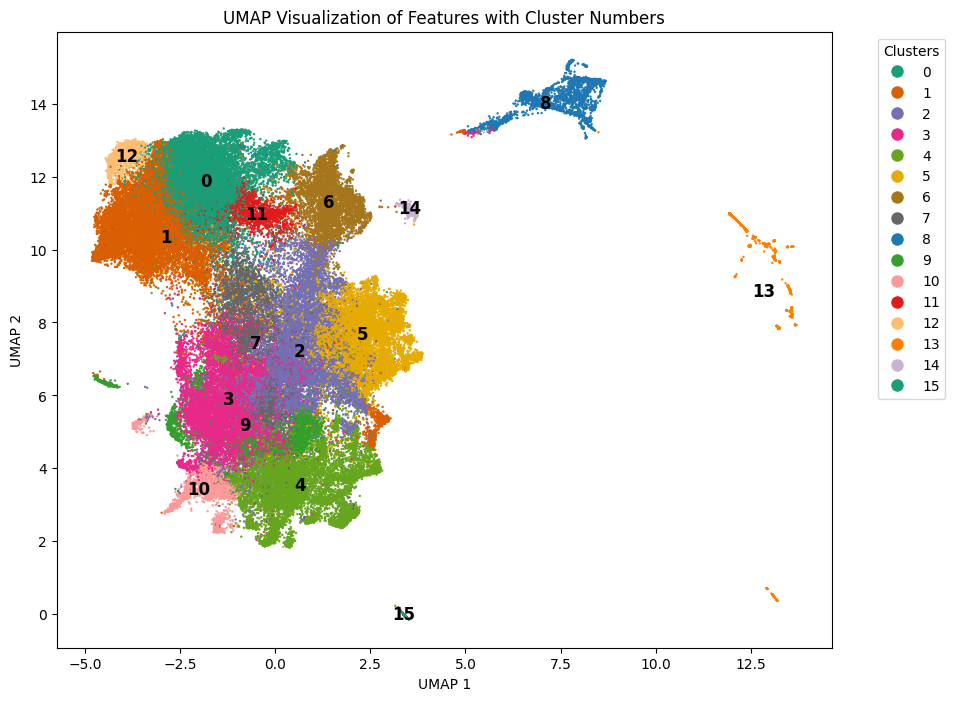

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
import umap
import igraph as ig
import leidenalg

# 自定义配色方案
colors = [
    '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', 
    '#a6761d', '#666666', '#1f78b4', '#33a02c', '#fb9a99', '#e31a1c', 
    '#fdbf6f', '#ff7f00', '#cab2d6'
]

# 将 features 转换为 pandas DataFrame
df_features = pd.DataFrame(features).astype(np.float32)

# 使用 LabelEncoder 转换 target
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# 计算最近邻
n_neighbors = 50
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(df_features)
adj_matrix = neighbors_fit.kneighbors_graph(df_features).toarray()

# 构建 igraph 图
sources, targets = np.where(adj_matrix)
weights = adj_matrix[sources, targets]
graph = ig.Graph(directed=False)
graph.add_vertices(df_features.shape[0])
graph.add_edges(zip(sources, targets))
graph.es['weight'] = weights

# 使用 Leiden 聚类算法
leiden_clusters = leidenalg.find_partition(graph, leidenalg.RBConfigurationVertexPartition, weights=graph.es['weight'], resolution_parameter=0.75,seed=42)
clusters = np.array(leiden_clusters.membership)
print(clusters)

# 使用 UMAP 进行降维
reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, random_state=42)
embedding = reducer.fit_transform(df_features)

# 绘制 UMAP 降维后的散点图，根据聚类标签进行着色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[colors[i % len(colors)] for i in clusters], s=0.5)

# 添加图例
handles = []
for i in range(len(set(clusters))):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i % len(colors)], markersize=10, label=str(i)))
plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

# 在每个聚类中显示编号
n_clusters = len(set(clusters))
for i in range(n_clusters):
    # 计算每个聚类的中心位置
    cluster_center = embedding[clusters == i].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], str(i), fontsize=12, ha='center', va='center', fontweight='bold')

plt.title('UMAP Visualization of Features with Cluster Numbers')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)
plt.savefig('/mnt/raid/zanzhuheng/working/NCOC/push_code/cluster/cluster_map/umap_color_cluster.pdf', bbox_inches='tight', format='pdf')
plt.show()


/home/zanzhuheng/anaconda3/envs/ncoc/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



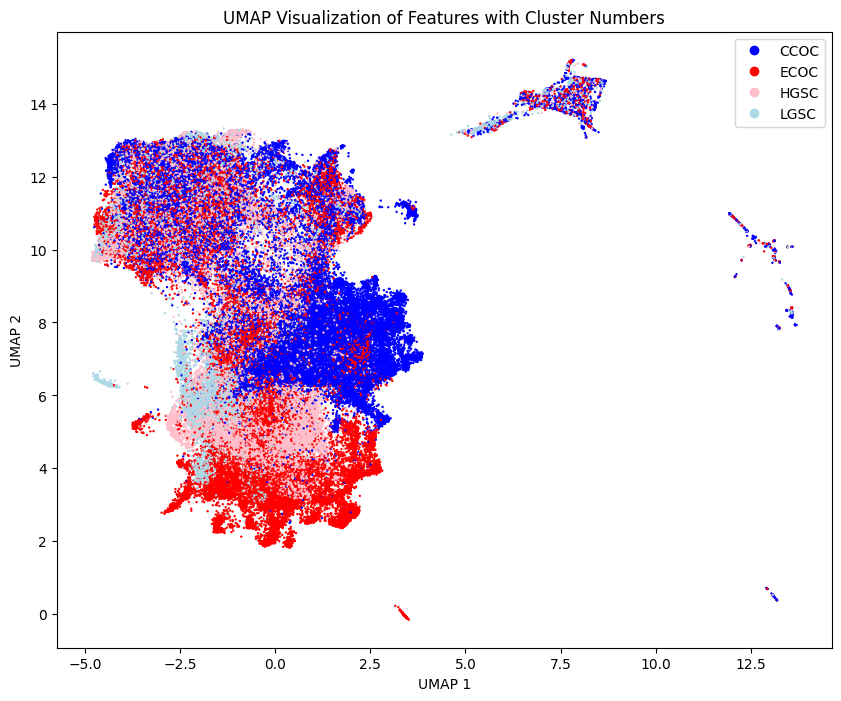

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
import umap
import igraph as ig
import leidenalg

# 将 features 转换为 pandas DataFrame
df_features = pd.DataFrame(features).astype(np.float32)

# 使用 LabelEncoder 转换 target
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# 定义类别标签
legend_labels = ['CCOC', 'ECOC', 'HGSC', 'LGSC']

# 计算最近邻
n_neighbors = 50
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(df_features)
adj_matrix = neighbors_fit.kneighbors_graph(df_features).toarray()

# 构建 igraph 图
sources, targets = np.where(adj_matrix)
weights = adj_matrix[sources, targets]
graph = ig.Graph(directed=False)
graph.add_vertices(df_features.shape[0])
graph.add_edges(zip(sources, targets))
graph.es['weight'] = weights

# 使用 Leiden 聚类算法
leiden_clusters = leidenalg.find_partition(graph, leidenalg.RBConfigurationVertexPartition, weights=graph.es['weight'], resolution_parameter=0.75,seed=42)
clusters = np.array(leiden_clusters.membership)

# 使用 UMAP 进行降维
reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=2, random_state=42)
embedding = reducer.fit_transform(df_features)

# 手动定义颜色映射，确保只有四种颜色
colors = ['blue', 'red', 'pink', 'lightblue']

# 绘制 UMAP 降维后的散点图，根据 target_encoded 进行着色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[colors[i] for i in target_encoded], s=0.5)

# 添加图例
handles = [plt.Line2D([0], [0], marker='o', color=colors[i], linestyle='') for i in range(len(legend_labels))]
plt.legend(handles, legend_labels, loc='best')

plt.title('UMAP Visualization of Features with Cluster Numbers')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)
plt.savefig('/mnt/raid/zanzhuheng/working/NCOC/push_code/cluster/cluster_map/umap_label_color_coolwarm.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [52]:
import plotly.express as px
import pandas as pd

# 将特征数据和标签整合成一个 DataFrame
df_plotly = pd.DataFrame({
    'UMAP 1': embedding[:, 0],
    'UMAP 2': embedding[:, 1],
    'target': target,
    'image_id': image_ids,
    'patch_id': patch_ids,
    'cluster': clusters  # 添加聚类标签到 DataFrame
})

# 创建 Plotly 散点图
fig = px.scatter(df_plotly, x='UMAP 1', y='UMAP 2', color='target', 
                 hover_data=['image_id', 'patch_id', 'cluster'], 
                 color_discrete_map={'CCOC': 'blue', 'ECOC': 'red', 'HGSC': 'pink', 'LGSC': 'lightblue'})

# 设置图表布局和标题
fig.update_layout(
    title='UMAP Visualization of Features with Clustering',
    xaxis_title='UMAP 1',
    yaxis_title='UMAP 2',
    legend_title='Target',
    height=800,
    width=1000,
)

# 保存图表为 HTML 文件
fig.write_html('/mnt/raid/zanzhuheng/working/NCOC/push_code/cluster/cluster_map/umap_visualization.html')

# 显示图表
# fig.show(renderer='notebook')


In [53]:
df_plotly.to_csv("/mnt/raid/zanzhuheng/working/NCOC/push_code/cluster/cluster_map/plotly.csv", index=False)

<Figure size 1500x1000 with 0 Axes>

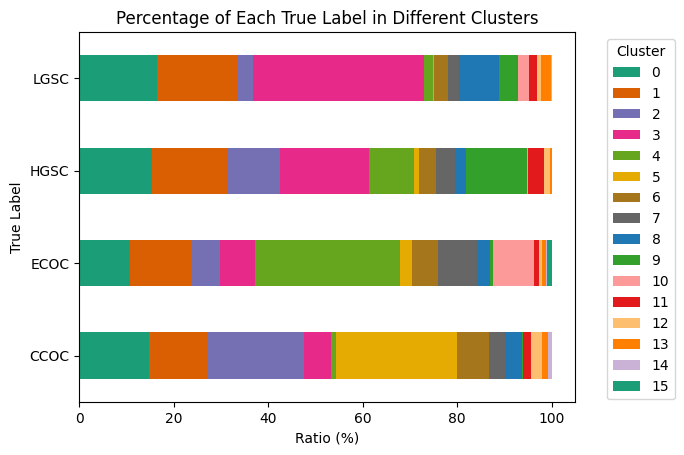

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您已经有了 target 和 clusters

# 自定义配色方案（科研论文风格）
colors = [
    '#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', 
    '#a6761d', '#666666', '#1f78b4', '#33a02c', '#fb9a99', '#e31a1c', 
    '#fdbf6f', '#ff7f00', '#cab2d6'
]

# 将数据整合到一个 DataFrame
df = pd.DataFrame({
    'target': target,
    'cluster': clusters
})

# 计算每个 `true_label` 在每个聚类中的数量
count_matrix = pd.crosstab(df['target'], df['cluster'])

# 计算每个类别在各个聚类中的占比
percentage_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0) * 100

# 绘制水平柱状图
plt.figure(figsize=(15, 10))
percentage_matrix.plot(kind='barh', stacked=True, color=colors[:len(percentage_matrix.columns)])
plt.title('Percentage of Each True Label in Different Clusters')
plt.ylabel('True Label')
plt.xlabel('Ratio (%)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
# plt.tight_layout()
plt.savefig('/mnt/raid/zanzhuheng/working/NCOC/push_code/cluster/cluster_map/true_label_cluster_percentage_horizontal.pdf', bbox_inches='tight', format='pdf')
plt.show()
